In [1]:
import os, sys
from pprint import pprint
import matplotlib.pyplot as plt
plt.style.use('ggplot')

for module in ['actions', 'models']:
    path = os.path.join(os.getcwd(), '..', module)
    sys.path.append(os.path.abspath(path))

from oracle import oracle
from inference import plot
from lstm_fixed import train_fixed
from load_data import load_data, prune

In [2]:
train_trials, eval_trials, test_trials = load_data()

# accuracies of the best models for each input type
model_accuracies = []

In [3]:
def get_top_models(model_names, accuracies, parameters, top_n=10):
     # get indicies for top models
    top_indicies = sorted(range(len(accuracies)), key=lambda i: accuracies[i])[-top_n:]

    # get names for top models
    top_models = [model_names[i] for i in top_indicies]

    # get accuracies for top models
    top_accuracies = [accuracies[i] for i in top_indicies]

    # get params for top models
    top_parameters = [parameters[i] for i in top_indicies]

    tops = (list(zip(top_accuracies, top_parameters)))
    pprint(tops)

    return top_models[-1], top_accuracies[-1]

### Oracle

In [4]:
# Aaronson Oracle Accuracies for windows 4, 5, 6 for reference
window_sizes = [3, 4, 5, 6, 7]
oracle_results = oracle(window_sizes, test_trials, cutoff=True, logging=False)

window_size = 0
oracle_accuracy = 0

for w in window_sizes:
    if oracle_results[w]['accuracy'] > oracle_accuracy:
        window_size = w
        oracle_accuracy = oracle_results[w]['accuracy']

print(window_size, round(oracle_accuracy, 2))

5 58.99


### Binary

In [5]:
train_trials_binary = prune(train_trials, 'binary')
eval_trials_binary = prune(eval_trials, 'binary')
test_trials_binary = prune(test_trials, 'binary')

In [6]:
models = []
parameters = []
accuracies = []

for _ in range(30):
    model_name, params, accuracy = train_fixed(
        train_trials_binary, eval_trials_binary, test_trials_binary, 
        input_size=1, random='binary', logging=False
    )
    models.append(model_name)
    parameters.append(params)
    accuracies.append(accuracy)

top_binary_model, top_binary_acc = get_top_models(models, accuracies, parameters)
model_accuracies.append(top_binary_acc)

[(59.550843609340795,
  {'batch_size': 81,
   'hidden_size': 74,
   'input_size': 1,
   'learning_rate': 0.0117,
   'num_epochs': 3,
   'num_stacked_layers': 1,
   'segment_length': 5}),
 (59.74133241400422,
  {'batch_size': 136,
   'hidden_size': 67,
   'input_size': 1,
   'learning_rate': 0.0102,
   'num_epochs': 3,
   'num_stacked_layers': 3,
   'segment_length': 9}),
 (59.94424603277397,
  {'batch_size': 124,
   'hidden_size': 51,
   'input_size': 1,
   'learning_rate': 0.0266,
   'num_epochs': 3,
   'num_stacked_layers': 1,
   'segment_length': 10}),
 (60.187000438052515,
  {'batch_size': 113,
   'hidden_size': 71,
   'input_size': 1,
   'learning_rate': 0.0139,
   'num_epochs': 3,
   'num_stacked_layers': 1,
   'segment_length': 8}),
 (60.25420296997296,
  {'batch_size': 74,
   'hidden_size': 79,
   'input_size': 1,
   'learning_rate': 0.0048,
   'num_epochs': 1,
   'num_stacked_layers': 2,
   'segment_length': 5}),
 (60.407578131045874,
  {'batch_size': 132,
   'hidden_size': 80

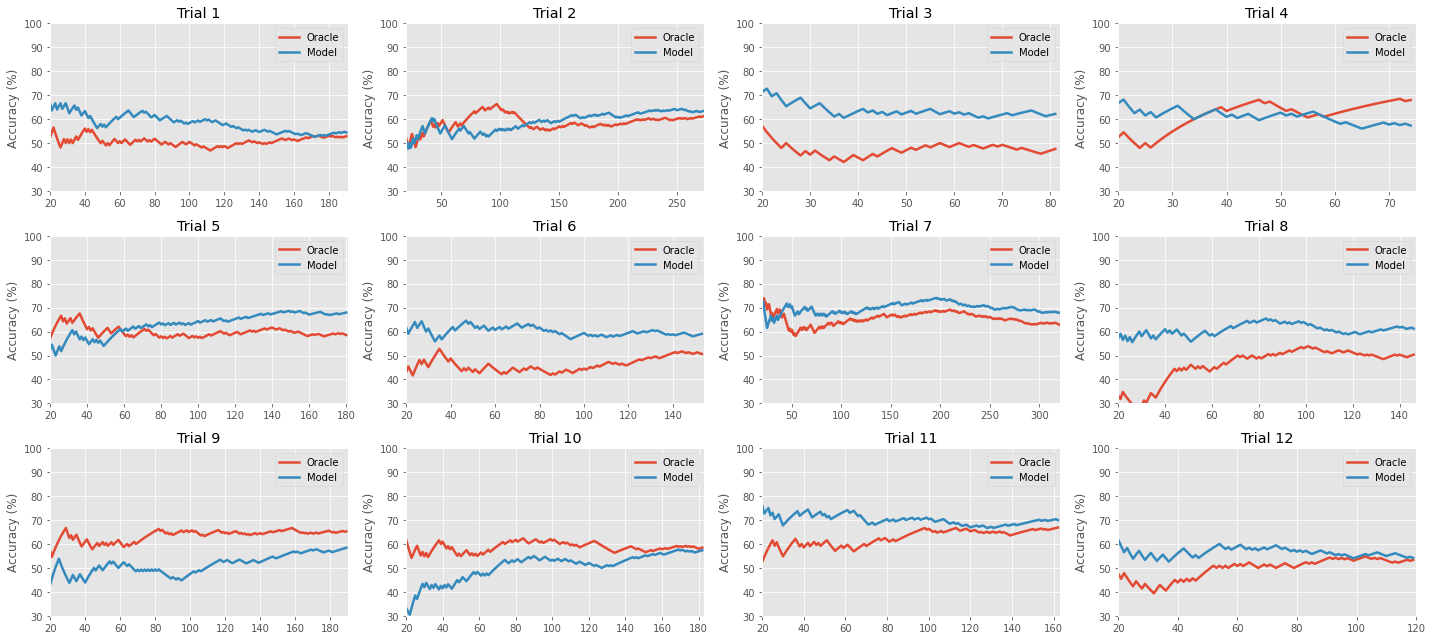

In [7]:
plot(test_trials, test_trials_binary, window_size, top_binary_model, cutoff=True)

### Delay

In [8]:
train_trials_delay = prune(train_trials, 'delay')
eval_trials_delay = prune(eval_trials, 'delay')
test_trials_delay = prune(test_trials, 'delay')

In [9]:
models = []
parameters = []
accuracies = []

for _ in range(30):
    model_name, params, accuracy = train_fixed(
        train_trials_delay, eval_trials_delay, test_trials_delay, 
        input_size=2, random='delay', logging=False,
    )
    models.append(model_name)
    parameters.append(params)
    accuracies.append(accuracy)

top_delay_model, top_delay_acc = get_top_models(models, accuracies, parameters)
model_accuracies.append(top_delay_acc)

[(62.29792833316797,
  {'batch_size': 96,
   'hidden_size': 54,
   'input_size': 2,
   'learning_rate': 0.0147,
   'num_epochs': 7,
   'num_stacked_layers': 2,
   'segment_length': 9}),
 (62.387040072338046,
  {'batch_size': 96,
   'hidden_size': 68,
   'input_size': 2,
   'learning_rate': 0.0039,
   'num_epochs': 7,
   'num_stacked_layers': 2,
   'segment_length': 8}),
 (62.48295425884447,
  {'batch_size': 121,
   'hidden_size': 54,
   'input_size': 2,
   'learning_rate': 0.0274,
   'num_epochs': 5,
   'num_stacked_layers': 2,
   'segment_length': 7}),
 (62.662914211894766,
  {'batch_size': 110,
   'hidden_size': 48,
   'input_size': 2,
   'learning_rate': 0.0059,
   'num_epochs': 5,
   'num_stacked_layers': 2,
   'segment_length': 11}),
 (62.96456106172501,
  {'batch_size': 101,
   'hidden_size': 47,
   'input_size': 2,
   'learning_rate': 0.0033,
   'num_epochs': 6,
   'num_stacked_layers': 2,
   'segment_length': 11}),
 (63.17002222248094,
  {'batch_size': 96,
   'hidden_size': 61,

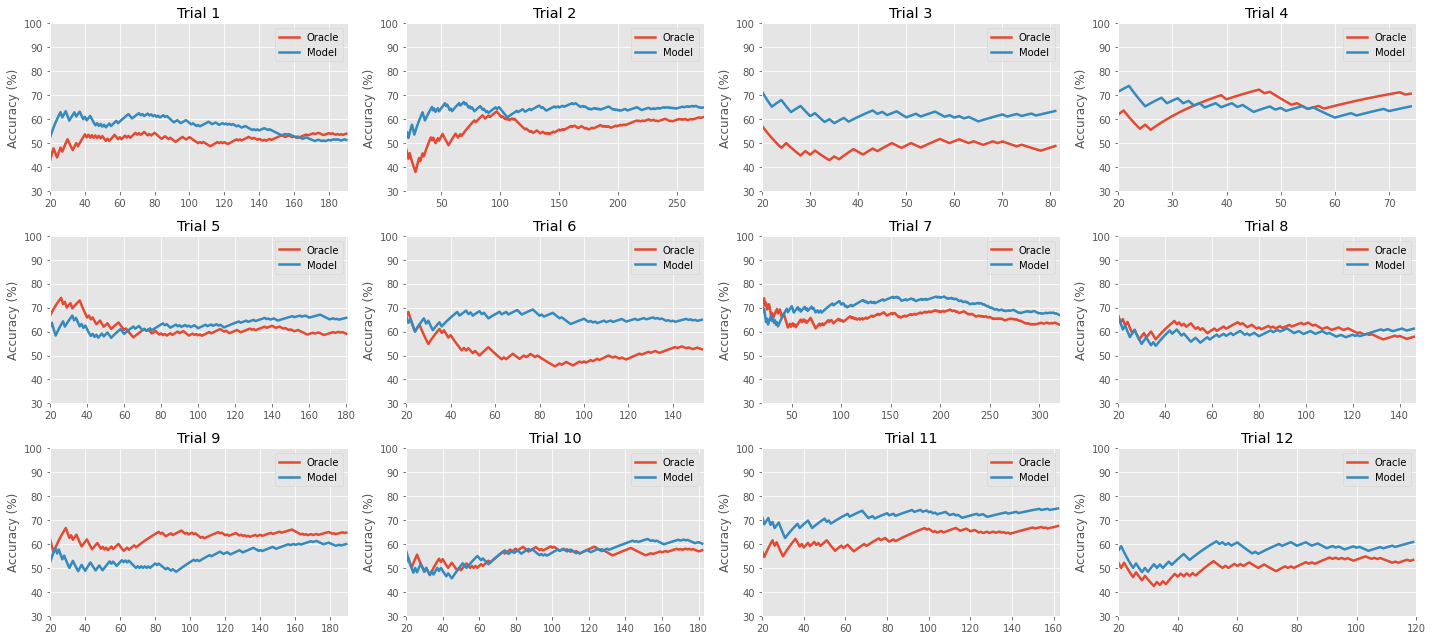

In [10]:
plot(test_trials, test_trials_delay, window_size, top_delay_model, cutoff=True)

### Pupils

In [11]:
train_trials_pupil = prune(train_trials, 'pupil')
eval_trials_pupil = prune(eval_trials, 'pupil')
test_trials_pupil = prune(test_trials, 'pupil')

In [12]:
models = []
parameters = []
accuracies = []

for _ in range(30):
    model_name, params, accuracy = train_fixed(
        train_trials_pupil, eval_trials_pupil, test_trials_pupil, 
        input_size=2, random='pupil', logging=False
    )
    models.append(model_name)
    parameters.append(params)
    accuracies.append(accuracy)

top_pupil_model, top_pupil_acc = get_top_models(models, accuracies, parameters)
model_accuracies.append(top_pupil_acc)

[(60.88502993331275,
  {'batch_size': 129,
   'hidden_size': 57,
   'input_size': 2,
   'learning_rate': 0.0173,
   'num_epochs': 6,
   'num_stacked_layers': 2,
   'segment_length': 8}),
 (60.91190179667605,
  {'batch_size': 101,
   'hidden_size': 62,
   'input_size': 2,
   'learning_rate': 0.0044,
   'num_epochs': 5,
   'num_stacked_layers': 2,
   'segment_length': 10}),
 (61.22630889203007,
  {'batch_size': 110,
   'hidden_size': 52,
   'input_size': 2,
   'learning_rate': 0.0053,
   'num_epochs': 7,
   'num_stacked_layers': 2,
   'segment_length': 13}),
 (61.49054642909641,
  {'batch_size': 112,
   'hidden_size': 64,
   'input_size': 2,
   'learning_rate': 0.0035,
   'num_epochs': 5,
   'num_stacked_layers': 3,
   'segment_length': 10}),
 (61.563830852998265,
  {'batch_size': 126,
   'hidden_size': 45,
   'input_size': 2,
   'learning_rate': 0.0099,
   'num_epochs': 5,
   'num_stacked_layers': 2,
   'segment_length': 10}),
 (61.6204994887214,
  {'batch_size': 129,
   'hidden_size': 

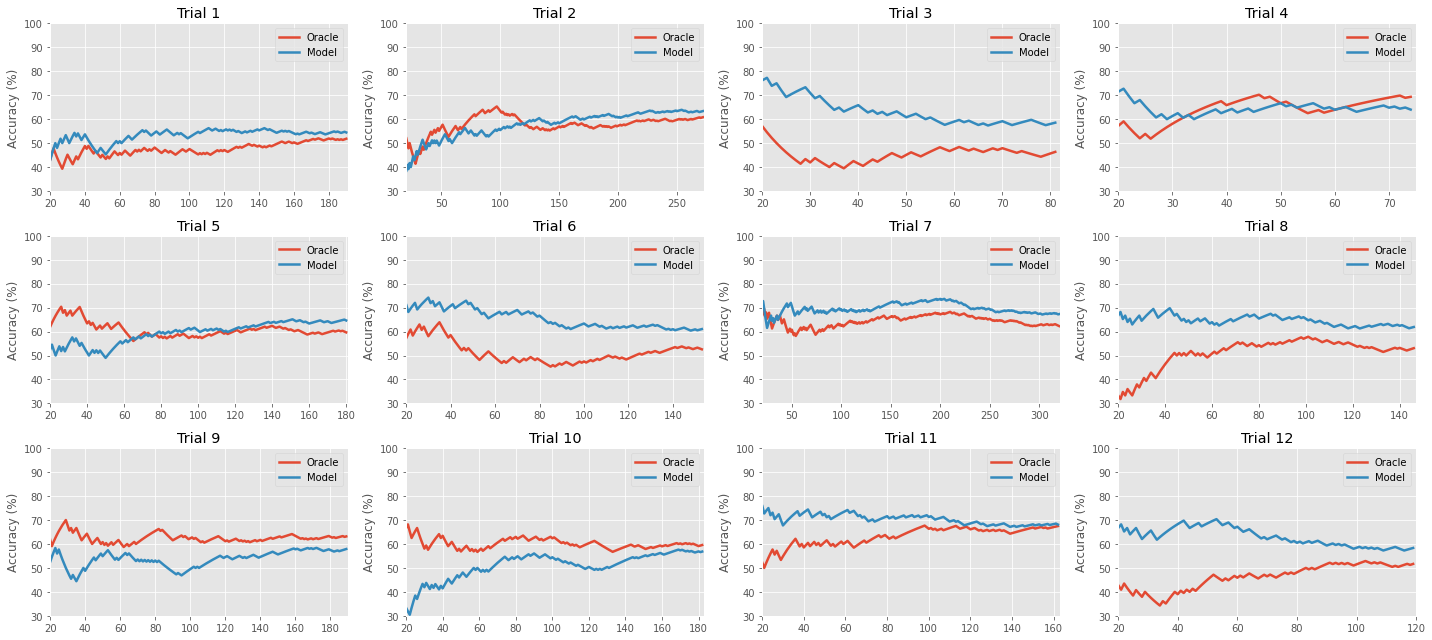

In [13]:
plot(test_trials, test_trials_pupil, window_size, top_pupil_model, cutoff=True)

### Delay + Pupil

In [14]:
models = []
parameters = []
accuracies = []

for _ in range(30):
    model_name, params, accuracy = train_fixed(
        train_trials, eval_trials, test_trials, 
        input_size=3, random='all', logging=False
    )
    models.append(model_name)
    parameters.append(params)
    accuracies.append(accuracy)

top_all_model, top_all_acc = get_top_models(models, accuracies, parameters)
model_accuracies.append(top_all_acc)

[(61.828809834014066,
  {'batch_size': 123,
   'hidden_size': 45,
   'input_size': 3,
   'learning_rate': 0.0055,
   'num_epochs': 7,
   'num_stacked_layers': 2,
   'segment_length': 8}),
 (61.95309711407582,
  {'batch_size': 127,
   'hidden_size': 57,
   'input_size': 3,
   'learning_rate': 0.0107,
   'num_epochs': 7,
   'num_stacked_layers': 2,
   'segment_length': 12}),
 (62.07001875267503,
  {'batch_size': 121,
   'hidden_size': 50,
   'input_size': 3,
   'learning_rate': 0.0197,
   'num_epochs': 5,
   'num_stacked_layers': 2,
   'segment_length': 13}),
 (62.21436933748014,
  {'batch_size': 126,
   'hidden_size': 62,
   'input_size': 3,
   'learning_rate': 0.0162,
   'num_epochs': 5,
   'num_stacked_layers': 2,
   'segment_length': 11}),
 (62.30638048452334,
  {'batch_size': 129,
   'hidden_size': 49,
   'input_size': 3,
   'learning_rate': 0.0059,
   'num_epochs': 7,
   'num_stacked_layers': 2,
   'segment_length': 8}),
 (62.34228391879511,
  {'batch_size': 129,
   'hidden_size': 

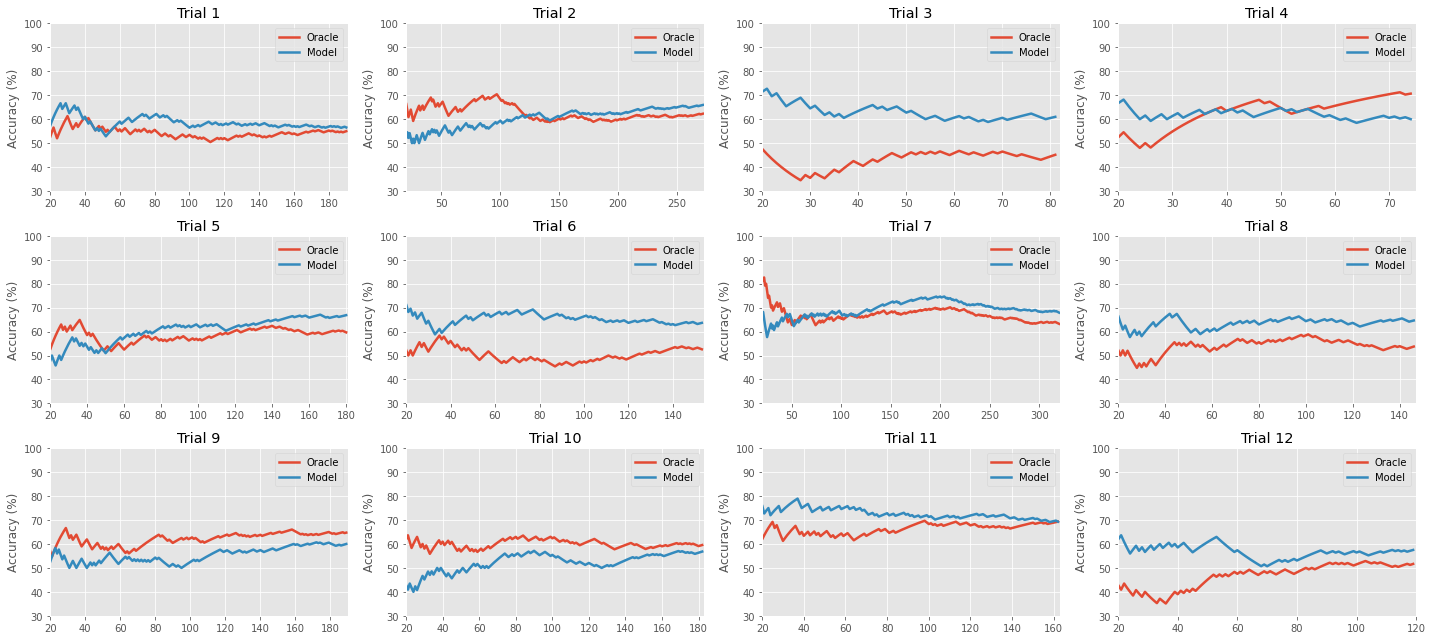

In [15]:
plot(test_trials, test_trials, window_size, top_all_model, cutoff=True)

### Plotting

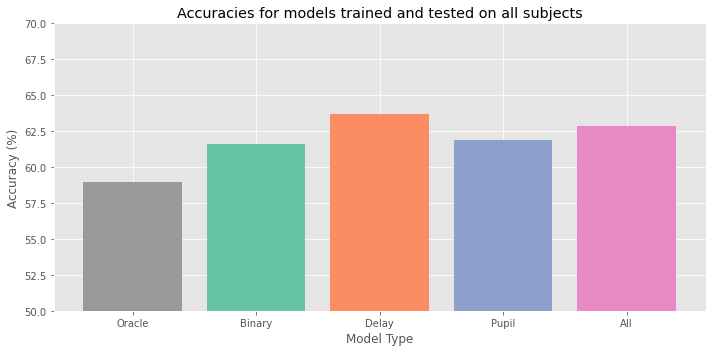

In [16]:
# use oracle accuracy and model accuracies to plot one bar chart of the results

plt.figure(figsize=(10, 5))
colors = ['#999999', '#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
plt.bar(['Oracle', 'Binary', 'Delay', 'Pupil', 'All'], [oracle_accuracy, *model_accuracies], color=colors)
plt.title('Accuracies for models trained and tested on all subjects')
plt.ylabel('Accuracy (%)')
plt.xlabel('Model Type')
plt.ylim(50, 70)
plt.tight_layout()
plt.savefig('plots/fixed_a2a.png')
plt.show()
